# Using the K-NN algorithm for classification of iris

Here we will classify if an Iris is 'Iris Setosa' or 'Iris Versicolour' or 'Iris Virginica' using the k nearest neighbor algorithm.

The training data is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris.

## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset


In [1]:
# Import the usual libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd 
df = pd.read_csv('iris.csv', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width", "label"])

df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data preprocesssing
As it is more convenient if the labels were integers instead of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica', we change our labels to 0, 1 and 2

In [2]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})

df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width"]

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


## Visualizing the data set

Using a scatter plot to visualize the dataset

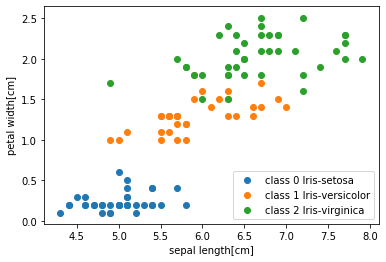

In [4]:
iris_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(0,3):
    plt.scatter(X_train[y_train == i, 0],
                X_train[y_train == i, 1],
            marker='o',
            label='class '+ str(i)+ ' '+ iris_names[i])

plt.xlabel('sepal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='lower right')

plt.show()

In [5]:
import math
from collections import Counter

#function to calculate the euclidean distance
def euclidean_distance(x1, x2):
    
    euc_distance = []
    for i in range(0, len(x1)):
        xOne = x1[i][0]
        yOne = x1[i][1]
        xTwo = x2[0]
        yTwo = x2[1]
        euc_distance.append(math.sqrt(pow((xOne - xTwo) , 2) + pow((yOne - yTwo) , 2)))
        
    return euc_distance
  

In [6]:
# function to calculate the manhattan distance
def manhattan_distance(x1, x2):
    man_distance = []
    for i in range(0, len(x1)):
        xOne = x1[i][0]
        yOne = x1[i][0]
        xTwo = x2[0]
        yTwo = x2[1]
        man_distance.append(abs(xTwo - xOne) + abs(yTwo - yOne))
        
    return man_distance

In [7]:
# function to calculate the chebyshev distance
def chebyshev_distance(x1, x2):
    cheb_distance = []
    for i in range(0, len(x1)):
        xOne = x1[i][0]
        yOne = x1[i][0]
        xTwo = x2[0]
        yTwo = x2[1]
        cheb_distance.append(max(abs(xTwo - xOne) , abs(yTwo - yOne)))
        
    
    return cheb_distance


In [8]:
# function to calculate neighbors using euclidean distance
def get_neighbors( X, y, x_test, k, distance= euclidean_distance): # we can also using the manhattan and chebyshev distance instead of euclidean

    my_distance = pd.DataFrame(distance, columns=['distance'])
    my_distance = my_distance.sort_values(by=['distance'])
    
    index = my_distance.index
    neighbors.append(give_label(index, k, y)) 

    return 

In [9]:
def give_label(index, k, y_train):
    
    if k==1:
        return y_train[index[0]]
    elif k==3:
        index = index[:3]
        my_y = np.take(y_train , index)
        my_counter = Counter(my_y).most_common()
        return my_counter[0][0]
    
    index = index[:5]
    my_y = np.take(y_train , index)
    my_counter = Counter(my_y).most_common()
    
    return my_counter[0][0]

In [14]:
neighbors = []
for j in range(0, len(X_test)):
    k = 1 # we can change the k values to get more number of nearest neighbors
    get_neighbors(X_train, y_train, X_test, k, euclidean_distance(X_train,X_test[j]))

In [15]:
neighbors = np.asarray(neighbors)

my_accuracy_test = np.where(neighbors == y_test , 0 , 1)

np_incorrect = sum(my_accuracy_test)
np_correct = len(neighbors) - np_incorrect

incorrect_classified_samples = np.where(neighbors != y_test)
print("Examples not classifed correctly" , incorrect_classified_samples[0])

accuracy = np_correct / len(y_test)
print("Accuracy for euclidean distance" , accuracy)                                        

Examples not classifed correctly [10 16]
Accuracy for euclidean distance 0.9473684210526315


# Using ZeroR for classification

In [16]:
#Zero-R classification

y_train_counter = Counter(y_train).most_common()

zeror_accuracy_test = np.where(y_test == 2, 0, 1)
zeror_incorrect = sum(zeror_accuracy_test)
zeror_correct = len(y_test) - zeror_incorrect


print("no of incorrect in zeroR: " , zeror_incorrect)
print("no of correct in zeroR" , zeror_correct)

zeror_accuracy = zeror_correct / len(y_test)
print("Zero-R accuracy" , zeror_accuracy)


no of incorrect in zeroR:  29
no of correct in zeroR 9
Zero-R accuracy 0.23684210526315788
